In [16]:
import os
from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
df = pd.read_csv('fifa19.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='ID', inplace=True)
df.drop(columns='Photo', inplace=True)
df.drop(columns='Flag', inplace=True)
df.drop(columns='Club Logo', inplace=True)
df.drop(columns='Joined', inplace=True)

In [4]:
def curr_value(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

In [5]:
curs=["Release Clause", "Value", "Wage"]
for cur in curs:
    df[cur] = df[cur].apply(curr_value)

In [6]:
cols=["LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW","LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB", "LDM","CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"]
for col in cols:
    df[col]=df[col].str[:-2]
    df[col]=df[col].astype(float)

In [7]:
df['Contract Valid Until']=df['Contract Valid Until'].str[-4:]
df['Contract Valid Until']=df['Contract Valid Until'].astype(float)

In [8]:
df['Height']=df['Height'].str.replace("'",'.')
df['Height']=df['Height'].astype(float)

df['Weight']=df['Weight'].str[:-3]
df['Weight']=df['Weight'].astype(float)

In [9]:
# prima della virgola ci sono le righe, dopo le colonne
X = df.loc[:, df.columns != 'Value']
y = df.loc[:,['Value']]
X = X.drop(columns='Name')
X = X.drop(columns='Real Face')

In [10]:
obj_df = X.select_dtypes(include=['object']).copy()

cols = obj_df.columns
for col in cols:
    print(col)
    X[col].replace(np.NaN,'NotAv',inplace=True)
    labelencoder_X = LabelEncoder()
    X[col] = labelencoder_X.fit_transform(X[col])

Nationality
Club
Preferred Foot
Work Rate
Body Type
Position
Loaned From


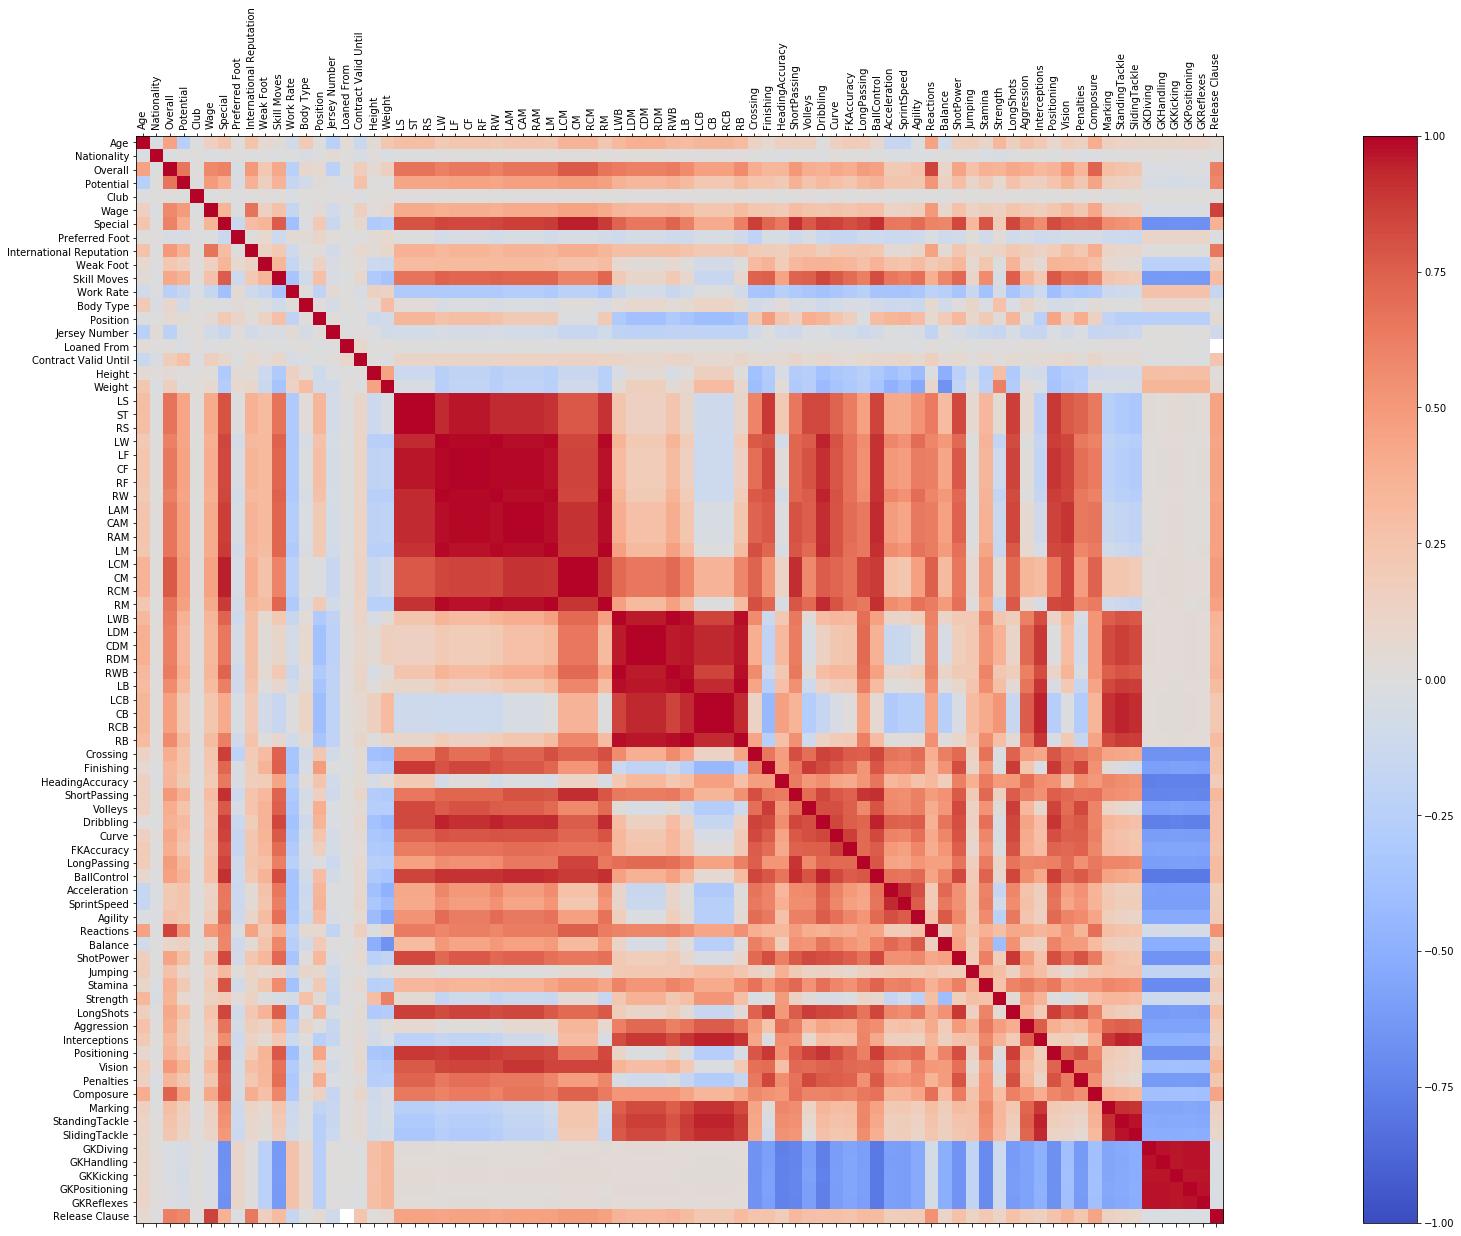

In [11]:
X1 = pd.DataFrame(X)
corr = X1.corr()
fig = plt.figure(figsize=(50,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

In [12]:
corr_matrix = X1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X = X.drop(columns=to_drop, axis=1)
print(to_drop)

['ST', 'RS', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'CB', 'RCB', 'RB', 'SlidingTackle', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
